# ADS Assignment 10.


In [1]:
import pandas as pd
# Load Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

In [37]:
#load dataset
df = pd.read_csv("KAG_conversion_data.csv")
df.tail(30)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
1113,1314384,1178,179951,35-39,F,113,441192,53,77.600000,6,2
1114,1314385,1178,179952,35-39,F,114,90470,11,16.730000,1,1
1115,1314386,1178,179953,40-44,F,100,834243,166,246.749998,18,7
1116,1314387,1178,179954,40-44,F,101,696612,152,223.189995,31,9
1117,1314388,1178,179955,40-44,F,102,329333,48,67.609999,1,0
1118,1314389,1178,179956,40-44,F,103,1114711,224,319.000002,6,0
1119,1314390,1178,179957,40-44,F,104,267316,58,82.929999,3,0
1120,1314391,1178,179958,40-44,F,105,228629,38,57.000000,2,0
1121,1314392,1178,179959,40-44,F,106,758340,159,233.110002,13,4
1122,1314393,1178,179960,40-44,F,107,877535,149,217.779997,5,2


In [3]:
df.shape

(1143, 11)

In [4]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [16]:
##Converting category labels into numerical using one_hot encoding

def hot_encode(df):
    obj_df = df.select_dtypes(include=['object'])
    return pd.get_dummies(df, columns=obj_df.columns).values

In [17]:
X = pd.get_dummies(df)
X

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,708746,916,103916,15,7350,1,1.430000,2,1,1,0,0,0,0,1
1,708749,916,103917,16,17861,2,1.820000,2,0,1,0,0,0,0,1
2,708771,916,103920,20,693,0,0.000000,1,0,1,0,0,0,0,1
3,708815,916,103928,28,4259,1,1.250000,1,0,1,0,0,0,0,1
4,708818,916,103928,28,4133,1,1.290000,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,109,1129773,252,358.189997,13,2,0,0,0,1,1,0
1139,1314411,1178,179978,110,637549,120,173.880003,3,0,0,0,0,1,1,0
1140,1314412,1178,179979,111,151531,28,40.289999,2,0,0,0,0,1,1,0
1141,1314414,1178,179981,113,790253,135,198.710000,8,2,0,0,0,1,1,0


3. Using a heat map to show the correlation in the data.
a. Drop the first 4 columns in the data frame X.
b. Basing your answer on what can be seen in the heat map, why did we drop these
columns?

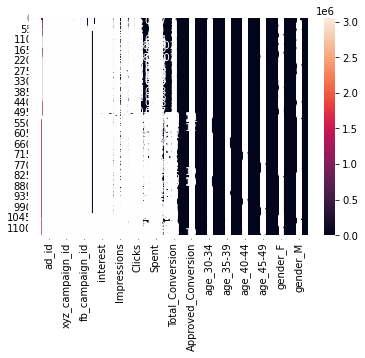

In [18]:
sns.heatmap(X, annot = True)


In [19]:
data = X.drop(columns=['ad_id', 'xyz_campaign_id','fb_campaign_id','interest'])
data

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,7350,1,1.430000,2,1,1,0,0,0,0,1
1,17861,2,1.820000,2,0,1,0,0,0,0,1
2,693,0,0.000000,1,0,1,0,0,0,0,1
3,4259,1,1.250000,1,0,1,0,0,0,0,1
4,4133,1,1.290000,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1129773,252,358.189997,13,2,0,0,0,1,1,0
1139,637549,120,173.880003,3,0,0,0,0,1,1,0
1140,151531,28,40.289999,2,0,0,0,0,1,1,0
1141,790253,135,198.710000,8,2,0,0,0,1,1,0


4. Using the elbow method:
a. Determine the best number of clusters for the data in the range of 2 to 20.
b. Also include the graphical plot for the elbow curve.

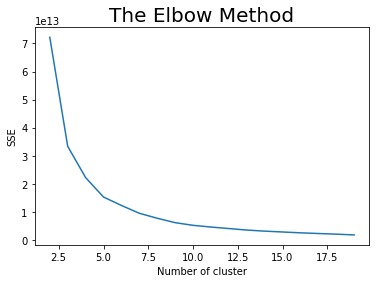

In [20]:
sse = {}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, max_iter=300).fit(X)
    X["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

We can see in plot, 5 is the optimal number of clusters for iris dataset, which is indeed correct.

5. Based on the result above in 4b use the value at your elbow point to cluster the values in
the data frame X.

In [54]:
km = KMeans(X,n_clusters=5)
km

KMeans(n_clusters=        ad_id  xyz_campaign_id  fb_campaign_id  interest  Impressions  Clicks  \
0      708746              916          103916        15         7350       1   
1      708749              916          103917        16        17861       2   
2      708771              916          103920        20          693       0   
3      708815              916          103928        28         4259       1   
4      708818              916          103928        28         4133       1   
...       ...              ...             ...       ...          ...     ...   
1138  1314410             1178          179977       109      1129773     252   
1139  1314411             1178          179978       110       637549     120   
1140  1314412             1178          179979       111       151531      28   
1141  1314414             1178          179981       113       790253     135   
1142...
           Spent  Total_Conversion  Approved_Conversion  age_30-34  age_35-39  \
0 

6. Use the model to predict the labels from the data and save them to variable y_means.

In [55]:
df = data.dropna()

In [32]:
# Prep
data.isnull().sum()

Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
age_30-34              0
age_35-39              0
age_40-44              0
age_45-49              0
gender_F               0
gender_M               0
dtype: int64

In [ ]:
# Fit n Predict
clusters = km.fit_predict(data)

7. Add the values in y_means to the original data frame (not X) as column ‘Advert_Type’.

8. Using any form of distribution plot of your choice and the original data frame, plot 2
graphs that can be used to answer the following:
a. Which advert type lead to the highest and consistent amount of sales by
customers of all the age brackets?
b. Does the company xyz have gender bias in terms of their ad spending? Are their
products gender neutral?

9. Perform the same analysis using hierarchical clustering and compare the results in terms
of the number of useable clusters.